# Import Packages / Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
import os 
import glob
import random
import shutil
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, InputLayer
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import nasnet, resnet50, densenet
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, fbeta_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json

%matplotlib inline

2024-06-01 12:20:24.305097: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Import File for DataFrame

In [2]:
df = pd.read_csv('cicada.csv')

In [3]:
df.head(2)

,IMAGE_ID,STATUS
0,comphotos132842002medium.jpg,0
1,comphotos132843559medium.jpeg,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   IMAGE_ID  1143 non-null   object
 1   STATUS    1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


In [5]:
print(df['STATUS'])

0       0
1       0
2       0
3       0
4       0
       ..
1138    1
1139    1
1140    1
1141    1
1142    1
Name: STATUS, Length: 1143, dtype: int64


In [6]:
df['STATUS'] = df['STATUS'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   IMAGE_ID  1143 non-null   object
 1   STATUS    1143 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


In [8]:
y = df['STATUS']
X = df

# Test Train Split

In [9]:
X_train_and_val , X_test, y_train_and_val, y_test = train_test_split(X, y,
                                            shuffle=True,
                                            test_size=0.2,
#                                            test_size=0.25,
                                            random_state = 201,
                                            stratify=y)

In [10]:
X_train , X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val,
                                            shuffle=True,
                                            test_size=0.15,
                                            random_state = 201,
                                            stratify=y_train_and_val)

In [11]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data and test data should not be augmented!

validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [12]:
X_train.head(2)

,IMAGE_ID,STATUS
945,comphotos167025376medium.jpeg,1
291,comphotos133340076medium.jpg,0


In [50]:
X_test

,IMAGE_ID,STATUS
1116,orgphotos138288618medium.jpeg,1
523,orgphotos146265815medium.jpg,0
232,comphotos133238899medium.jpeg,0
746,comphotos133941790medium.jpg,1
532,comphotos130245059medium-checkpoint.jpg,1
...,...,...
1093,orgphotos134130460medium.jpeg,1
870,comphotos136398663medium.jpeg,1
979,comphotos377208937medium.jpg,1
325,comphotos133550732medium.jpeg,0


# Create Generators from DataFrames for Train, Validation, and Test

In [13]:
train_generator = train_datagen.flow_from_dataframe(
    X_train,
    directory='data_images',
    x_col='IMAGE_ID',
    y_col='STATUS',
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=20,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    subset=None,
    interpolation='nearest',
    validate_filenames=True
    #**kwargs
)

Found 776 validated image filenames belonging to 2 classes.


In [14]:
validation_generator = validation_datagen.flow_from_dataframe(
    X_val,
    directory='data_images',
    x_col='IMAGE_ID',
    y_col='STATUS',
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=20,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    subset=None,
    interpolation='nearest',
    validate_filenames=True
    #**kwargs
)

Found 138 validated image filenames belonging to 2 classes.


In [15]:
test_generator = test_datagen.flow_from_dataframe(
    X_test,
    directory='data_images',
    x_col='IMAGE_ID',
    y_col='STATUS',
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=20,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    subset=None,
    interpolation='nearest',
    validate_filenames=True
    #**kwargs
)

Found 229 validated image filenames belonging to 2 classes.


In [53]:
X_test

,IMAGE_ID,STATUS
1116,orgphotos138288618medium.jpeg,1
523,orgphotos146265815medium.jpg,0
232,comphotos133238899medium.jpeg,0
746,comphotos133941790medium.jpg,1
532,comphotos130245059medium-checkpoint.jpg,1
...,...,...
1093,orgphotos134130460medium.jpeg,1
870,comphotos136398663medium.jpeg,1
979,comphotos377208937medium.jpg,1
325,comphotos133550732medium.jpeg,0


# VGG16 Model

In [16]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (256, 256, 3), 

include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [17]:
for layer in base_model.layers:
    layer.trainable = False

In [18]:
#freeze / unfreeze then model.fit


# Flatten the output layer to 1 dimension
X = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
X = layers.Dense(512, activation='relu')(X)

# Add a dropout rate of 0.5
X = layers.Dropout(0.5)(X)

# Add a final sigmoid layer with 1 node for classification output
X = layers.Dense(1, activation='sigmoid')(X)

model = tf.keras.models.Model(base_model.input, X)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [19]:
# ORIGINAL vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)
vgghist16 = model.fit(train_generator, 
                    validation_data = validation_generator,
                    verbose=1, epochs=7)

Epoch 1/7


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step - acc: 0.5102 - loss: 1.4188 - val_acc: 0.6159 - val_loss: 0.7070
Epoch 2/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - acc: 0.6325 - loss: 0.6806 - val_acc: 0.5870 - val_loss: 0.6965
Epoch 3/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step - acc: 0.6671 - loss: 0.6812 - val_acc: 0.6449 - val_loss: 0.6312
Epoch 4/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 150s 4s/step - acc: 0.6569 - loss: 0.6556 - val_acc: 0.6522 - val_loss: 0.6926
Epoch 5/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 306s 8s/step - acc: 0.7046 - loss: 0.5689 - val_acc: 0.6594 - val_loss: 0.6696
Epoch 6/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - acc: 0.6896 - loss: 0.5813 - val_acc: 0.6522 - val_loss: 0.6819
Epoch 7/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - acc: 0.7030 - loss: 0.5720 - val_acc: 0.7029 - val_loss: 0.6124


In [20]:
X_train['IMAGE_ID'][0]

'comphotos132842002medium.jpg'

In [21]:
labels = {}
labels[0] = 'Healthy'
labels[1] = 'Infected'
labels

{0: 'Healthy', 1: 'Infected'}

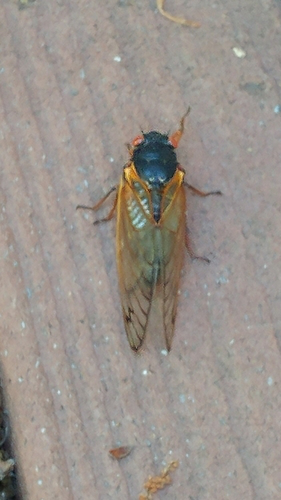

In [22]:
from PIL import Image

img_ID = df.IMAGE_ID[31]
img = Image.open('data_images/'+img_ID)
display(img)

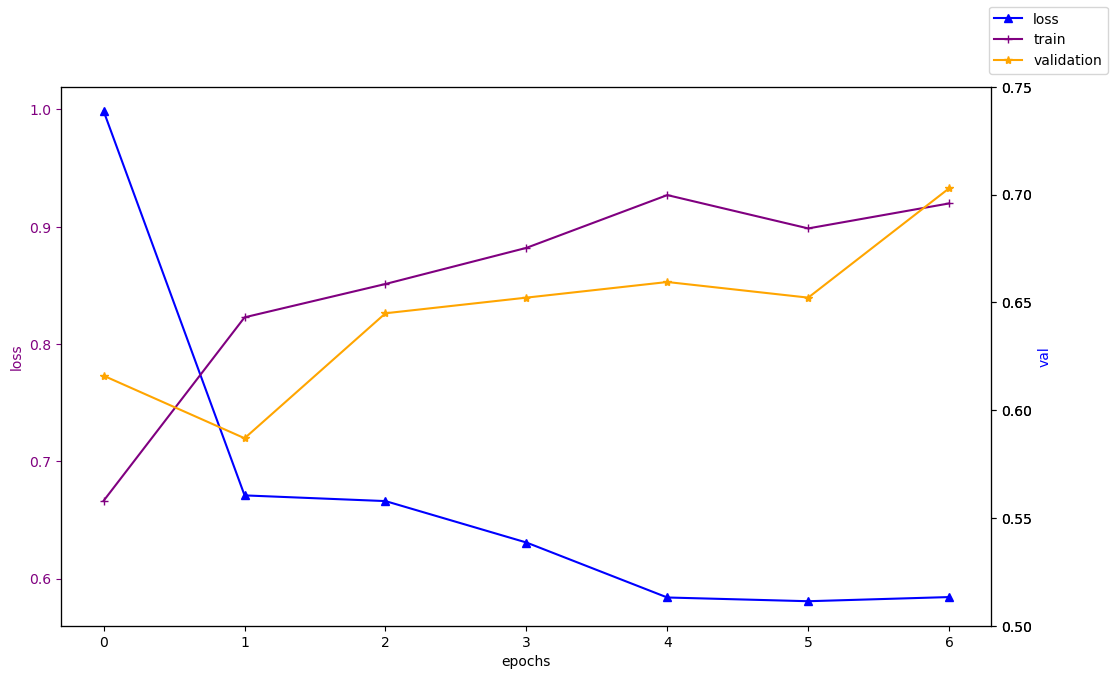

In [23]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(vgghist16.epoch, vgghist16.history['loss'], marker='^', color='blue', label='loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')
#ax1.set_ylim(0.5,1)

ax2 = ax1.twinx()
plt.plot(vgghist16.epoch, vgghist16.history['acc'], marker='+', color='purple', label='train')
ax2.set_ylabel('val', color='blue')
ax2.set_ylim((0.5,0.75))

ax3 = ax1.twinx()
plt.plot(vgghist16.epoch, vgghist16.history['val_acc'], marker='*', color='orange', label='validation')
ax3.set_ylim((0.5,0.75))

#ax4 = ax1.twinx()
#ax4.plot(vgghist16.epoch, vgghist16.history['val_loss'], marker='^', color='pink',label='val loss')
#ax4.set_xlabel('epochs')
#ax4.tick_params('y', colors='blue')
#ax4.set_ylim(0,1.2)


fig.legend();

In [189]:
vgghist16 = model.fit(test_generator,verbose=1, epochs=7)

Epoch 1/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - acc: 1.0000 - loss: 0.0030
Epoch 2/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - acc: 1.0000 - loss: 0.0011
Epoch 3/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - acc: 1.0000 - loss: 0.0024
Epoch 4/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - acc: 1.0000 - loss: 8.1196e-04
Epoch 5/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - acc: 1.0000 - loss: 5.2881e-04
Epoch 6/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - acc: 1.0000 - loss: 5.1749e-04
Epoch 7/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - acc: 1.0000 - loss: 6.1356e-04


In [190]:
#1.Predict classes
import sklearn
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = vgghist16.model.predict(test_generator)

# Get most likely class
predicted_classes = [1 * (x[0]>=0.5) for x in predictions]

# 2.Get ground-truth classes and class-labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

# 3. Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix,classification_report,f1_score

print(class_labels)

print(confusion_matrix(test_generator.classes, predicted_classes))
print(fbeta_score)
report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 955ms/step
['0', '1']
[[53 54]
 [54 68]]
<function fbeta_score at 0x14d38df80>
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       107
           1       0.56      0.56      0.56       122

    accuracy                           0.53       229
   macro avg       0.53      0.53      0.53       229
weighted avg       0.53      0.53      0.53       229



# Extract Image Predictions

In [140]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

In [142]:
vgghist16.model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,271,172 (184.14 MB)

 Trainable params: 16,778,241 (64.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 16,778,243 (64.00 MB)

In [145]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(data_images):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [150]:
history = vgghist16.model.fit(train_generator, 
                    validation_data = validation_generator,
                    verbose=1, epochs=7)




Epoch 1/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - acc: 0.6973 - loss: 0.5672 - val_acc: 0.7319 - val_loss: 0.5727
Epoch 2/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - acc: 0.7233 - loss: 0.5403 - val_acc: 0.6812 - val_loss: 0.6449
Epoch 3/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - acc: 0.7107 - loss: 0.5586 - val_acc: 0.7536 - val_loss: 0.5428
Epoch 4/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 158s 4s/step - acc: 0.7536 - loss: 0.5253 - val_acc: 0.7391 - val_loss: 0.5571
Epoch 5/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - acc: 0.7508 - loss: 0.5114 - val_acc: 0.7246 - val_loss: 0.5813
Epoch 6/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - acc: 0.7476 - loss: 0.5108 - val_acc: 0.7391 - val_loss: 0.5920
Epoch 7/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - acc: 0.7717 - loss: 0.5094 - val_acc: 0.6812 - val_loss: 0.6942


# VGG19 Model

# Import File for DataFrame

In [79]:
df = pd.read_csv('cicada.csv')

In [80]:
df.head(2)

,IMAGE_ID,STATUS
0,comphotos132842002medium.jpg,0
1,comphotos132843559medium.jpeg,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   IMAGE_ID  1143 non-null   object
 1   STATUS    1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


In [82]:
print(df['STATUS'])

0       0
1       0
2       0
3       0
4       0
       ..
1138    1
1139    1
1140    1
1141    1
1142    1
Name: STATUS, Length: 1143, dtype: int64


In [83]:
df['STATUS'] = df['STATUS'].astype(str)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   IMAGE_ID  1143 non-null   object
 1   STATUS    1143 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


In [85]:
y = df['STATUS']
X = df

# Test Train Split

In [86]:
X_train_and_val , X_test, y_train_and_val, y_test = train_test_split(X, y,
                                            shuffle=True,
                                            test_size=0.2,
                                            random_state = 201,
                                            stratify=y)

In [87]:
X_train , X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val,
                                            shuffle=True,
                                            test_size=0.15,
                                            random_state = 201,
                                            stratify=y_train_and_val)

In [88]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data and test data should not be augmented!

validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [89]:
X_train.head(2)

,IMAGE_ID,STATUS
945,comphotos167025376medium.jpeg,1
291,comphotos133340076medium.jpg,0


# Create Generators from DataFrames for Train, Validation, and Test

In [90]:
train_generator = train_datagen.flow_from_dataframe(
    X_train,
    directory='data_images',
    x_col='IMAGE_ID',
    y_col='STATUS',
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=20,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    subset=None,
    interpolation='nearest',
    validate_filenames=True
    #**kwargs
)

Found 776 validated image filenames belonging to 2 classes.


In [91]:
validation_generator = validation_datagen.flow_from_dataframe(
    X_val,
    directory='data_images',
    x_col='IMAGE_ID',
    y_col='STATUS',
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=20,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    subset=None,
    interpolation='nearest',
    validate_filenames=True
    #**kwargs
)

Found 138 validated image filenames belonging to 2 classes.


In [92]:
test_generator = test_datagen.flow_from_dataframe(
    X_test,
    directory='data_images',
    x_col='IMAGE_ID',
    y_col='STATUS',
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=20,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    subset=None,
    interpolation='nearest',
    validate_filenames=True
    #**kwargs
)

Found 229 validated image filenames belonging to 2 classes.


In [97]:
from tensorflow.keras.applications.vgg19 import VGG19

base_model = VGG19(input_shape = (256, 256, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [98]:
for layer in base_model.layers:
    layer.trainable = False

In [99]:
# Flatten the output layer to 1 dimension
X = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
X = layers.Dense(512, activation='relu')(X)

# Add a dropout rate of 0.5
X = layers.Dropout(0.5)(X)

# Add a final sigmoid layer with 1 node for classification output
X = layers.Dense(1, activation='sigmoid')(X)

model = tf.keras.models.Model(base_model.input, X)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [100]:
vgghist19 = model.fit(train_generator, validation_data = validation_generator,verbose=1, epochs=7)

Epoch 1/7


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 378s 10s/step - acc: 0.5558 - loss: 1.4323 - val_acc: 0.6014 - val_loss: 0.6980
Epoch 2/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 364s 9s/step - acc: 0.5735 - loss: 0.7452 - val_acc: 0.7101 - val_loss: 0.6102
Epoch 3/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 365s 9s/step - acc: 0.6451 - loss: 0.6416 - val_acc: 0.6232 - val_loss: 0.6301
Epoch 4/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 354s 9s/step - acc: 0.6789 - loss: 0.6319 - val_acc: 0.6087 - val_loss: 0.6462
Epoch 5/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 388s 10s/step - acc: 0.6857 - loss: 0.5966 - val_acc: 0.6957 - val_loss: 0.6045
Epoch 6/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 403s 10s/step - acc: 0.6895 - loss: 0.5660 - val_acc: 0.6377 - val_loss: 0.6857
Epoch 7/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 435s 11s/step - acc: 0.7183 - loss: 0.5670 - val_acc: 0.6884 - val_loss: 0.5866


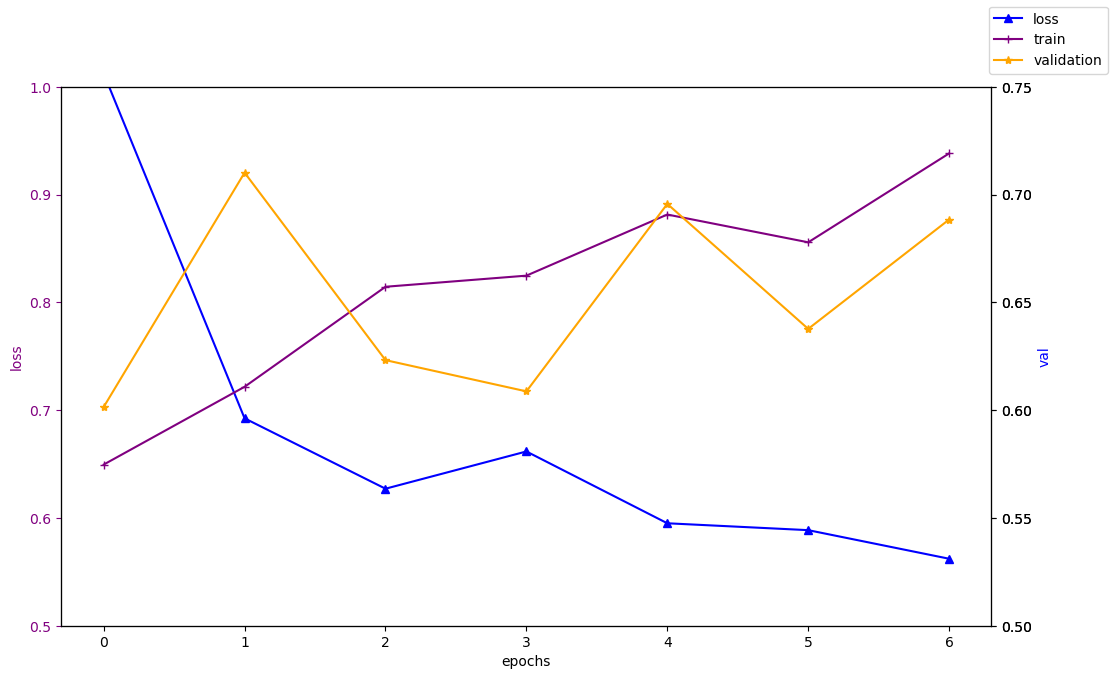

In [198]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(vgghist19.epoch, vgghist19.history['loss'], marker='^', color='blue', label='loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')
ax1.set_ylim(0.5,1)

ax2 = ax1.twinx()
plt.plot(vgghist19.epoch, vgghist19.history['acc'], marker='+', color='purple', label='train')
ax2.set_ylabel('val', color='blue')
ax2.set_ylim((0.5,0.75))

ax3 = ax1.twinx()
plt.plot(vgghist19.epoch, vgghist19.history['val_acc'], marker='*', color='orange', label='validation')
ax3.set_ylim((0.5,0.75))

#ax4 = ax1.twinx()
#ax4.plot(vgghist16.epoch, vgghist16.history['val_loss'], marker='^', color='pink',label='val loss')
#ax4.set_xlabel('epochs')
#ax4.tick_params('y', colors='blue')
#ax4.set_ylim(0,1.2)


fig.legend();

In [188]:
vgghist19 = model.fit(test_generator,verbose=1, epochs=7)

Epoch 1/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - acc: 0.9461 - loss: 0.0992
Epoch 2/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - acc: 1.0000 - loss: 0.0053
Epoch 3/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - acc: 1.0000 - loss: 0.0028
Epoch 4/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - acc: 1.0000 - loss: 0.0023
Epoch 5/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - acc: 1.0000 - loss: 0.0017
Epoch 6/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - acc: 1.0000 - loss: 0.0021
Epoch 7/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - acc: 1.0000 - loss: 0.0011


In [102]:
#1.Predict classes
import sklearn
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = vgghist19.model.predict(test_generator)

# Get most likely class
predicted_classes = [1 * (x[0]>=0.5) for x in predictions]

# 2.Get ground-truth classes and class-labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

# 3. Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix,classification_report,f1_score

print(class_labels)

print(confusion_matrix(test_generator.classes, predicted_classes))
print(fbeta_score)
report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

12/12 ━━━━━━━━━━━━━━━━━━━━ 93s 8s/step
['0', '1']
[[52 55]
 [68 54]]
<function fbeta_score at 0x14cd3dee0>
              precision    recall  f1-score   support

           0       0.43      0.49      0.46       107
           1       0.50      0.44      0.47       122

    accuracy                           0.46       229
   macro avg       0.46      0.46      0.46       229
weighted avg       0.47      0.46      0.46       229



# Inceptionv2 model

# Import File for DataFrame

In [165]:
df = pd.read_csv('cicada.csv')

In [166]:
df.head(2)

,IMAGE_ID,STATUS
0,comphotos132842002medium.jpg,0
1,comphotos132843559medium.jpeg,0


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   IMAGE_ID  1143 non-null   object
 1   STATUS    1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


In [168]:
print(df['STATUS'])

0       0
1       0
2       0
3       0
4       0
       ..
1138    1
1139    1
1140    1
1141    1
1142    1
Name: STATUS, Length: 1143, dtype: int64


In [169]:
df['STATUS'] = df['STATUS'].astype(str)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   IMAGE_ID  1143 non-null   object
 1   STATUS    1143 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


In [171]:
y = df['STATUS']
X = df

# Test Train Split

In [172]:
X_train_and_val , X_test, y_train_and_val, y_test = train_test_split(X, y,
                                            shuffle=True,
                                            test_size=0.2,
#                                            test_size=0.25,
                                            random_state = 201,
                                            stratify=y)

In [173]:
X_train , X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val,
                                            shuffle=True,
                                            test_size=0.15,
                                            random_state = 201,
                                            stratify=y_train_and_val)

In [174]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data and test data should not be augmented!

validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [175]:
X_train.head(2)

,IMAGE_ID,STATUS
945,comphotos167025376medium.jpeg,1
291,comphotos133340076medium.jpg,0


# Create Generators from DataFrames for Train, Validation, and Test

In [176]:
train_generator = train_datagen.flow_from_dataframe(
    X_train,
    directory='data_images',
    x_col='IMAGE_ID',
    y_col='STATUS',
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=20,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    subset=None,
    interpolation='nearest',
    validate_filenames=True
    #**kwargs
)

Found 776 validated image filenames belonging to 2 classes.


In [177]:
validation_generator = validation_datagen.flow_from_dataframe(
    X_val,
    directory='data_images',
    x_col='IMAGE_ID',
    y_col='STATUS',
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=20,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    subset=None,
    interpolation='nearest',
    validate_filenames=True
    #**kwargs
)

Found 138 validated image filenames belonging to 2 classes.


In [178]:
test_generator = test_datagen.flow_from_dataframe(
    X_test,
    directory='data_images',
    x_col='IMAGE_ID',
    y_col='STATUS',
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=20,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    subset=None,
    interpolation='nearest',
    validate_filenames=True
    #**kwargs
)

Found 229 validated image filenames belonging to 2 classes.


In [179]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (256, 256, 3), include_top = False, weights = 'imagenet')

In [180]:
for layer in base_model.layers:
    layer.trainable = False

In [181]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [182]:
inchist = model.fit(train_generator, validation_data = validation_generator,verbose=1, epochs=7)

Epoch 1/7


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - acc: 0.6404 - loss: 5.3792 - val_acc: 0.6812 - val_loss: 1.0919
Epoch 2/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - acc: 0.6895 - loss: 1.3918 - val_acc: 0.6957 - val_loss: 1.0654
Epoch 3/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - acc: 0.6868 - loss: 0.9209 - val_acc: 0.6957 - val_loss: 0.7659
Epoch 4/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - acc: 0.7431 - loss: 0.6875 - val_acc: 0.7971 - val_loss: 0.4413
Epoch 5/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - acc: 0.7517 - loss: 0.5664 - val_acc: 0.7391 - val_loss: 0.5177
Epoch 6/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - acc: 0.7639 - loss: 0.5143 - val_acc: 0.7609 - val_loss: 0.4222
Epoch 7/7
39/39 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - acc: 0.7561 - loss: 0.5343 - val_acc: 0.7826 - val_loss: 0.4630


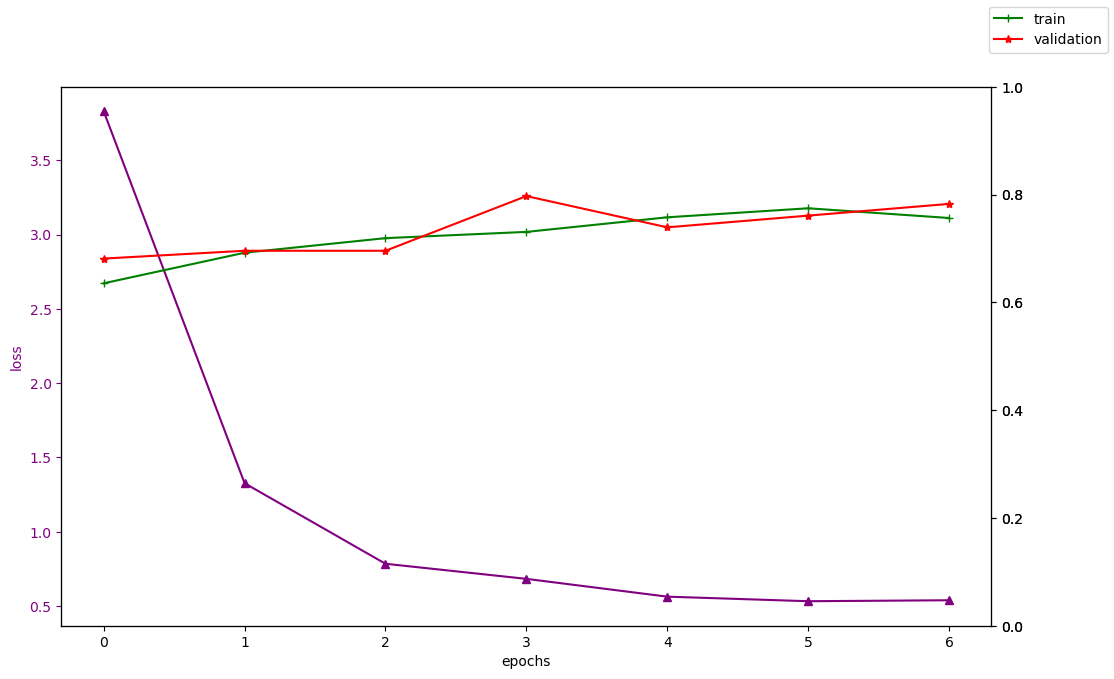

In [183]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(inchist.epoch, inchist.history['loss'], marker='^', color='purple')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')

ax2 = ax1.twinx()
plt.plot(inchist.epoch, inchist.history['acc'], marker='+', color='green', label='train')
ax2.set_ylim(0,1)

ax3 = ax1.twinx()
plt.plot(inchist.epoch, inchist.history['val_acc'], marker='*', color='red', label='validation')
ax3.set_ylim(0,1)


fig.legend();

In [186]:
inchist = model.fit(test_generator,verbose=1, epochs=7)

Epoch 1/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - acc: 0.9918 - loss: 0.0739
Epoch 2/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - acc: 0.9971 - loss: 0.0349
Epoch 3/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - acc: 0.9930 - loss: 0.0548
Epoch 4/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - acc: 1.0000 - loss: 0.0201
Epoch 5/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - acc: 1.0000 - loss: 0.0082
Epoch 6/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - acc: 1.0000 - loss: 0.0101
Epoch 7/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - acc: 0.9968 - loss: 0.0140


In [187]:
#1.Predict classes
import sklearn
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = inchist.model.predict(test_generator)

# Get most likely class
predicted_classes = [1 * (x[0]>=0.5) for x in predictions]

# 2.Get ground-truth classes and class-labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

# 3. Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix,classification_report

print(class_labels)

print(confusion_matrix(test_generator.classes, predicted_classes))

report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 675ms/step
['0', '1']
[[57 50]
 [78 44]]
              precision    recall  f1-score   support

           0       0.42      0.53      0.47       107
           1       0.47      0.36      0.41       122

    accuracy                           0.44       229
   macro avg       0.45      0.45      0.44       229
weighted avg       0.45      0.44      0.44       229



# VGG16 Tuning Parameters and pulling levers

In [265]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
import os 
import glob
import random
import shutil
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input, InputLayer
from tensorflow.keras import optimizers
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import nasnet, resnet50, densenet
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, fbeta_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import json

%matplotlib inline

# Import File for DataFrame

In [266]:
df = pd.read_csv('cicada.csv')

In [267]:
df.head(2)

,IMAGE_ID,STATUS
0,comphotos132842002medium.jpg,0
1,comphotos132843559medium.jpeg,0


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   IMAGE_ID  1143 non-null   object
 1   STATUS    1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


In [269]:
print(df['STATUS'])

0       0
1       0
2       0
3       0
4       0
       ..
1138    1
1139    1
1140    1
1141    1
1142    1
Name: STATUS, Length: 1143, dtype: int64


In [270]:
df['STATUS'] = df['STATUS'].astype(str)

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   IMAGE_ID  1143 non-null   object
 1   STATUS    1143 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


In [272]:
y = df['STATUS']
X = df

# Test Train Split

In [273]:
X_train_and_val , X_test, y_train_and_val, y_test = train_test_split(X, y,
                                            shuffle=True,
                                            test_size=0.35,
#                                            test_size=0.25,
                                            random_state = 201,
                                            stratify=y)

In [274]:
X_train , X_val, y_train, y_val = train_test_split(X_train_and_val, y_train_and_val,
                                            shuffle=True,
                                            test_size=0.25,
                                            random_state = 201,
                                            stratify=y_train_and_val)

In [275]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 30, width_shift_range = 0.2, height_shift_range = 0.3, shear_range = 0.2, zoom_range = 0.3, horizontal_flip = True)

# Note that the validation data and test data should not be augmented!

validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [276]:
X_train.head(2)

,IMAGE_ID,STATUS
994,comphotos380146625medium.jpg,1
581,comphotos131628649medium.jpeg,1


In [277]:
X_test

,IMAGE_ID,STATUS
406,comphotos160212377medium.jpeg,0
234,comphotos133239757medium.jpeg,0
282,comphotos133280695medium.jpg,0
299,comphotos133424965medium.jpeg,0
1010,comphotos40552605medium.jpg,1
...,...,...
1007,comphotos3901209medium.jpeg,1
232,comphotos133238899medium.jpeg,0
306,comphotos133425658medium.jpeg,0
812,comphotos134617500medium.jpeg,1


# Create Generators from DataFrames for Train, Validation, and Test

In [278]:
train_generator = train_datagen.flow_from_dataframe(
    X_train,
    directory='data_images',
    x_col='IMAGE_ID',
    y_col='STATUS',
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=20,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    subset=None,
    interpolation='nearest',
    validate_filenames=True
    #**kwargs
)

Found 556 validated image filenames belonging to 2 classes.


In [279]:
validation_generator = validation_datagen.flow_from_dataframe(
    X_val,
    directory='data_images',
    x_col='IMAGE_ID',
    y_col='STATUS',
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=20,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    subset=None,
    interpolation='nearest',
    validate_filenames=True
    #**kwargs
)

Found 186 validated image filenames belonging to 2 classes.


In [280]:
test_generator = test_datagen.flow_from_dataframe(
    X_test,
    directory='data_images',
    x_col='IMAGE_ID',
    y_col='STATUS',
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=20,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    subset=None,
    interpolation='nearest',
    validate_filenames=True
    #**kwargs
)

Found 401 validated image filenames belonging to 2 classes.


In [281]:
X_test

,IMAGE_ID,STATUS
406,comphotos160212377medium.jpeg,0
234,comphotos133239757medium.jpeg,0
282,comphotos133280695medium.jpg,0
299,comphotos133424965medium.jpeg,0
1010,comphotos40552605medium.jpg,1
...,...,...
1007,comphotos3901209medium.jpeg,1
232,comphotos133238899medium.jpeg,0
306,comphotos133425658medium.jpeg,0
812,comphotos134617500medium.jpeg,1


# VGG16 Model

In [282]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (256, 256, 3), 

include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [283]:
for layer in base_model.layers:
    layer.trainable = False

In [284]:
#freeze / unfreeze then model.fit


# Flatten the output layer to 1 dimension
X = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
X = layers.Dense(512, activation='relu')(X)

# Add a dropout rate of 0.5
X = layers.Dropout(0.5)(X)

# Add a final sigmoid layer with 1 node for classification output
X = layers.Dense(1, activation='sigmoid')(X)

model = tf.keras.models.Model(base_model.input, X)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [285]:
# ORIGINAL vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)
vgghist16 = model.fit(train_generator, 
                    validation_data = validation_generator,
                    verbose=1, epochs=7)

Epoch 1/7


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 153s 5s/step - acc: 0.4850 - loss: 1.8216 - val_acc: 0.5591 - val_loss: 0.7015
Epoch 2/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - acc: 0.5292 - loss: 0.8283 - val_acc: 0.7204 - val_loss: 0.5625
Epoch 3/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 150s 5s/step - acc: 0.5294 - loss: 0.7618 - val_acc: 0.4785 - val_loss: 0.7585
Epoch 4/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 157s 6s/step - acc: 0.6236 - loss: 0.6669 - val_acc: 0.7796 - val_loss: 0.5295
Epoch 5/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 156s 5s/step - acc: 0.6393 - loss: 0.6639 - val_acc: 0.6667 - val_loss: 0.5625
Epoch 6/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 148s 5s/step - acc: 0.6272 - loss: 0.6425 - val_acc: 0.7419 - val_loss: 0.5326
Epoch 7/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - acc: 0.6371 - loss: 0.6185 - val_acc: 0.7527 - val_loss: 0.5177


In [20]:
X_train['IMAGE_ID'][0]

'comphotos132842002medium.jpg'

In [21]:
labels = {}
labels[0] = 'Healthy'
labels[1] = 'Infected'
labels

{0: 'Healthy', 1: 'Infected'}

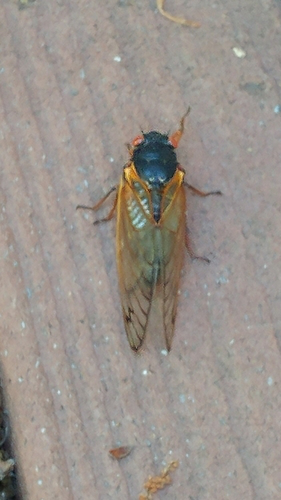

In [22]:
from PIL import Image

img_ID = df.IMAGE_ID[31]
img = Image.open('data_images/'+img_ID)
display(img)

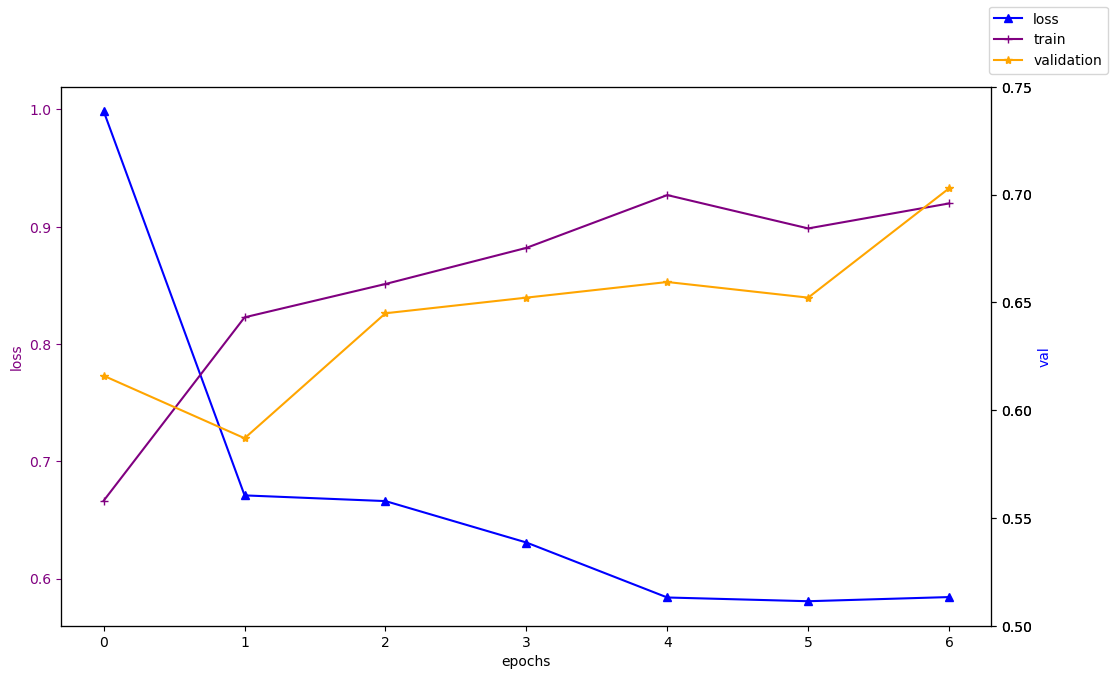

In [23]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(vgghist16.epoch, vgghist16.history['loss'], marker='^', color='blue', label='loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')
#ax1.set_ylim(0.5,1)

ax2 = ax1.twinx()
plt.plot(vgghist16.epoch, vgghist16.history['acc'], marker='+', color='purple', label='train')
ax2.set_ylabel('val', color='blue')
ax2.set_ylim((0.5,0.75))

ax3 = ax1.twinx()
plt.plot(vgghist16.epoch, vgghist16.history['val_acc'], marker='*', color='orange', label='validation')
ax3.set_ylim((0.5,0.75))

#ax4 = ax1.twinx()
#ax4.plot(vgghist16.epoch, vgghist16.history['val_loss'], marker='^', color='pink',label='val loss')
#ax4.set_xlabel('epochs')
#ax4.tick_params('y', colors='blue')
#ax4.set_ylim(0,1.2)


fig.legend();

In [286]:
vgghist16 = model.fit(test_generator,verbose=1, epochs=7)

Epoch 1/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - acc: 0.7253 - loss: 0.5933
Epoch 2/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - acc: 0.7668 - loss: 0.5058
Epoch 3/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - acc: 0.8386 - loss: 0.3933
Epoch 4/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 79s 4s/step - acc: 0.8135 - loss: 0.4083
Epoch 5/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - acc: 0.8739 - loss: 0.2999
Epoch 6/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - acc: 0.9312 - loss: 0.2421
Epoch 7/7
21/21 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - acc: 0.8935 - loss: 0.2584


In [287]:
#1.Predict classes
import sklearn
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = vgghist16.model.predict(test_generator)

# Get most likely class
predicted_classes = [1 * (x[0]>=0.5) for x in predictions]

# 2.Get ground-truth classes and class-labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

# 3. Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix,classification_report,f1_score

print(class_labels)

print(confusion_matrix(test_generator.classes, predicted_classes))
print(fbeta_score)
report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

21/21 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step
['0', '1']
[[ 69 118]
 [ 71 143]]
<function fbeta_score at 0x14d38df80>
              precision    recall  f1-score   support

           0       0.49      0.37      0.42       187
           1       0.55      0.67      0.60       214

    accuracy                           0.53       401
   macro avg       0.52      0.52      0.51       401
weighted avg       0.52      0.53      0.52       401

